In [13]:
import pandas_datareader as pdr
import pandas as pd

In [14]:
df=pd.read_csv("C:\\Users\\nisha\\OneDrive\\Desktop\\AAPL.csv")

In [15]:
df.head()

,Date,Volume,High,Low,Close,Adj Close,Price
0,1-Jun-23,9490.00,9500.00,9395.05,9461.00,9461.00,9490.00
1,2-Jun-23,9327.30,9520.00,9300.00,9470.20,9470.20,9327.30
2,3-Jun-23,9420.00,9427.00,9305.00,9327.30,9327.30,9420.00
3,4-Jun-23,9439.05,9494.35,9373.80,9403.05,9403.05,9439.05
4,5-Jun-23,9502.00,9537.00,9396.05,9440.85,9440.85,9502.00


In [16]:
df1=df.reset_index()['Price']
df1.shape

(222,)

In [17]:
import matplotlib.pyplot as plt

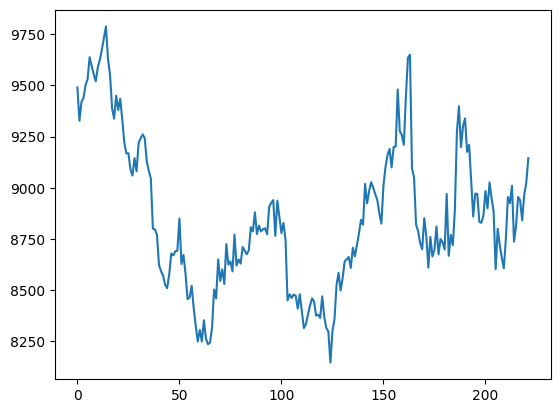

In [18]:
plt.plot(df1)

In [19]:
import numpy as np

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1.shape

(222, 1)

In [24]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size

In [25]:
training_size,test_size

(155, 67)

In [26]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)    

In [28]:
time_step=5
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)

In [29]:
print(X_train)

[[0.81840341 0.71925655 0.7757465  0.78735527 0.82571603]
 [0.71925655 0.7757465  0.78735527 0.82571603 0.84277879]
 [0.7757465  0.78735527 0.82571603 0.84277879 0.90859232]
 [0.78735527 0.82571603 0.84277879 0.90859232 0.88241926]
 [0.82571603 0.84277879 0.90859232 0.88241926 0.85801341]
 [0.84277879 0.90859232 0.88241926 0.85801341 0.83668495]
 [0.90859232 0.88241926 0.85801341 0.83668495 0.8781231 ]
 [0.88241926 0.85801341 0.83668495 0.8781231  0.90067032]
 [0.85801341 0.83668495 0.8781231  0.90067032 0.93144424]
 [0.83668495 0.8781231  0.90067032 0.93144424 0.96648385]
 [0.8781231  0.90067032 0.93144424 0.96648385 1.        ]
 [0.90067032 0.93144424 0.96648385 1.         0.90310786]
 [0.93144424 0.96648385 1.         0.90310786 0.85648995]
 [0.96648385 1.         0.90310786 0.85648995 0.75685558]
 [1.         0.90310786 0.85648995 0.75685558 0.72547227]
 [0.90310786 0.85648995 0.75685558 0.72547227 0.79399756]
 [0.85648995 0.75685558 0.72547227 0.79399756 0.75137112]
 [0.75685558 0

In [30]:
print(X_test.shape),print(ytest.shape)

(61, 5)
(61,)


(None, None)

In [31]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 8s 886ms/step - loss: 0.1958 - val_loss: 0.1983
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1561 - val_loss: 0.1479
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1123 - val_loss: 0.0920
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0688 - val_loss: 0.0389
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0326 - val_loss: 0.0170
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0263 - val_loss: 0.0333
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0378 - val_loss: 0.0246
Epoch 8/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0262 - val_loss: 0.0165
Epoch 9/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0196 - val_loss: 0.0201
Epoch 10/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0210 - val_loss: 0.0234
Epoch 11/100
3/3 [

Epoch 84/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0079 - val_loss: 0.0192
Epoch 85/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0079 - val_loss: 0.0192
Epoch 86/100
3/3 [==============================] - 0s 37ms/step - loss: 0.0078 - val_loss: 0.0191
Epoch 87/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0078 - val_loss: 0.0190
Epoch 88/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0078 - val_loss: 0.0188
Epoch 89/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0079 - val_loss: 0.0188
Epoch 90/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0079 - val_loss: 0.0186
Epoch 91/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0078 - val_loss: 0.0188
Epoch 92/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0079 - val_loss: 0.0184
Epoch 93/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0079 - val_loss: 0.0184
Epoch 94/1

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [37]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8805.394839379222

In [39]:
math.sqrt(mean_squared_error(ytest,test_predict))

8920.539902055603

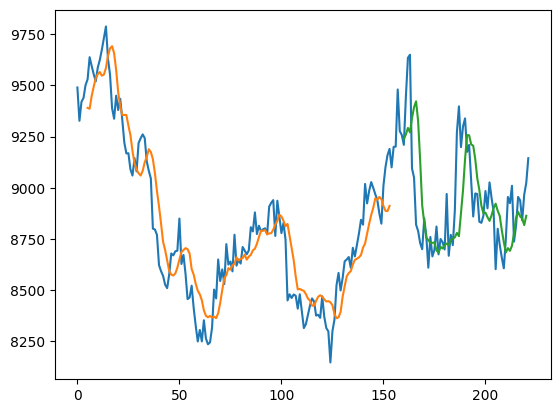

In [40]:
look_back=5
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()